In [2]:
import pandas as pd
from isaac.visualization import plot_lineplot_with_paper_style, plot_confusion_matrix_given_predicted_and_test_loader
from isaac.constants import FORCE_CLASS_COLS, MASS_CLASS_COLS, BASIC_TRAINING_COLS, PUCK_SQUARE_DISTANCES, PUCK_ANGLE_FEATURES
from isaac.evaluation import evaluate_saved_model

In [3]:
from isaac.utils import get_cuda_device_if_available
device = get_cuda_device_if_available()
print(device)

cuda:0


In [3]:
directory = "final_choice_plots/"

In [4]:
question_type = "force"
force_stats = pd.read_hdf(directory+question_type+"_stats.h5")
question_type = "mass"
mass_stats = pd.read_hdf(directory+question_type+"_stats.h5")

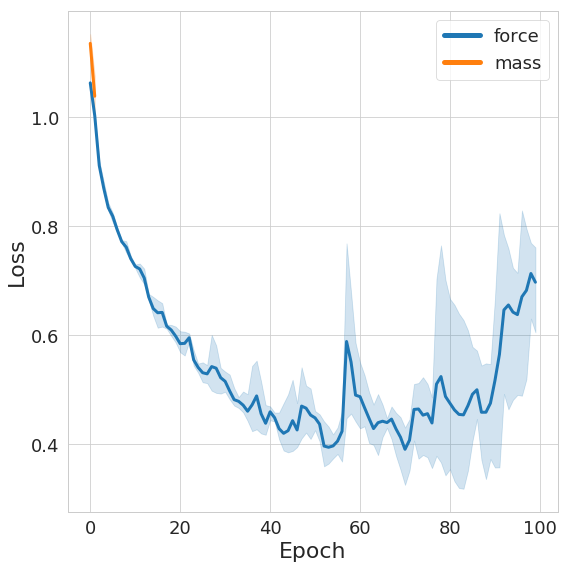

In [5]:
ax = plot_lineplot_with_paper_style(None, x="Epoch", y="Loss", 
                                    markers=True, data=force_stats, 
                                    linewidth=3, label="force")

ax = plot_lineplot_with_paper_style(directory+"losses.pdf", x="Epoch", y="Loss", 
                                    markers=True, data=mass_stats, linewidth=3, label="mass", ax=ax)

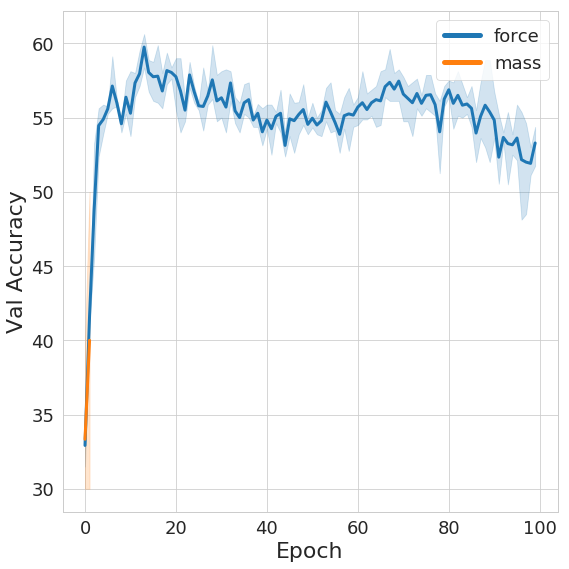

In [6]:
ax = plot_lineplot_with_paper_style(None, x="Epoch", y="Val Accuracy", data=force_stats, label="force")
ax = plot_lineplot_with_paper_style(directory+"accuracies.pdf", x="Epoch", y="Val Accuracy", data=mass_stats, label="mass", ax=ax)

In [7]:
question_type = "force"

  1%|          | 11/1000 [00:00<00:09, 108.19it/s]

data/test_passive_trials.h5


100%|██████████| 1000/1000 [00:01<00:00, 848.38it/s]


Model's accuracy on test set: 57.4


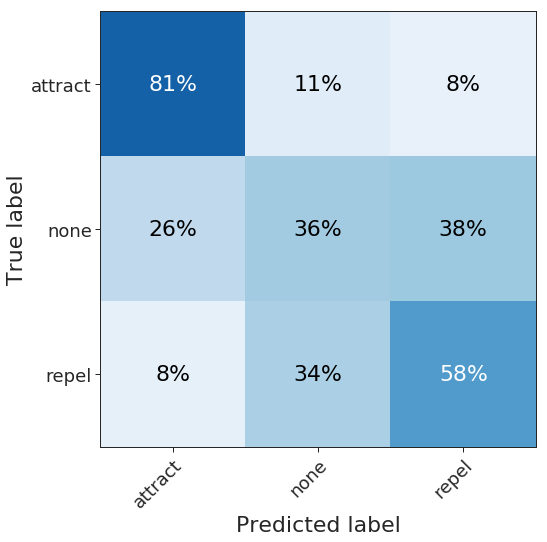

  3%|▎         | 8/260 [00:00<00:03, 74.26it/s]

data/passive_trials_exp1.h5


100%|██████████| 260/260 [00:00<00:00, 801.02it/s]


Model's accuracy on test set: 51.15384615384615


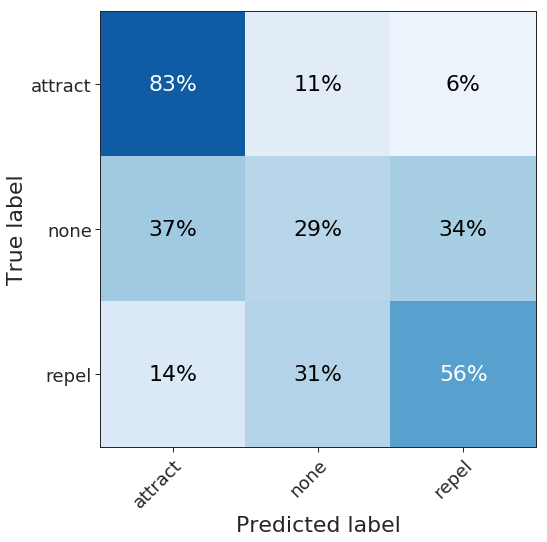

In [8]:
SEQ_END = 1800

if question_type == "force":    
    class_columns = FORCE_CLASS_COLS
    TR_COLS = BASIC_TRAINING_COLS + PUCK_SQUARE_DISTANCES + PUCK_ANGLE_FEATURES
    STEP_SIZE = 3
else:
    class_columns = MASS_CLASS_COLS
    TR_COLS = BASIC_TRAINING_COLS
    STEP_SIZE = 4
    
model_path = "models/passive_"+question_type+"_model.pt"
scaler_path = "scalers/passive_"+question_type+"_scaler.sk"
network_dims = (len(TR_COLS), 25, 4, 3, 0.5)
paths = ["final_choice_plots/test_data_"+question_type+"_cm.pdf",
         "final_choice_plots/neils_data_"+question_type+"_cm.pdf"]

for test_dataset_path, path in zip(["data/test_passive_trials.h5", "data/passive_trials_exp1.h5"],
                                               paths):
    print(test_dataset_path)

    accuracy, predicted, test_loader = evaluate_saved_model(model_path, network_dims, test_dataset_path, TR_COLS,
                                                            class_columns, step_size=STEP_SIZE, seq_end=SEQ_END, 
                                                            scaler_path=scaler_path, 
                                                            device=device, return_test_loader=True)
    
    
    ax = plot_confusion_matrix_given_predicted_and_test_loader(predicted, test_loader, class_columns, save_plot_path=path)